In [7]:
from rtlsdr import RtlSdr
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import pandas as pd
import csv
import time

In [8]:
sdr = RtlSdr()
sdr.sample_rate = 2.4e6 # Hz
sdr.center_freq = 92.7e6   # Hz
sdr.freq_correction = 60  # PPM
sdr.gain = 'auto'

print(len(sdr.read_samples(1024)))
sdr.close()

1024


[-9.9, -4.0, 7.1, 17.9, 19.2]
0.0


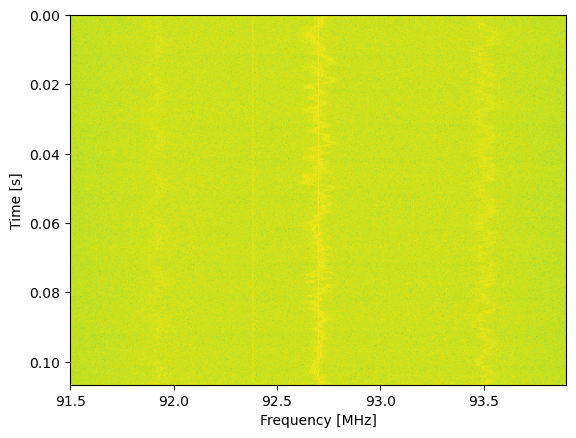

In [9]:

sdr = RtlSdr()
sdr.sample_rate = 2.4e6 # Hz
sdr.center_freq = 92.7e6   # Hz
sdr.freq_correction = 60  # PPM
print(sdr.valid_gains_db)
sdr.gain = 49.6
print(sdr.gain)
fft_size = 512
num_rows = 500
x = sdr.read_samples(2048)
x = sdr.read_samples(fft_size*num_rows) # get all the samples we need for the spectrogram
spectrogram = np.zeros((num_rows, fft_size))
for i in range(num_rows):
    spectrogram[i,:] = 10*np.log10(np.abs(np.fft.fftshift(np.fft.fft(x[i*fft_size:(i+1)*fft_size])))**2)
extent = [(sdr.center_freq + sdr.sample_rate/-2)/1e6,
            (sdr.center_freq + sdr.sample_rate/2)/1e6,
            len(x)/sdr.sample_rate, 0]
plt.imshow(spectrogram, aspect='auto', extent=extent)
plt.xlabel("Frequency [MHz]")
plt.ylabel("Time [s]")
plt.show()
sdr.close()